# HT 1. Análisis Exploratorio y Regresión Lineal

#### Gabriel Vicente 20498 y Oscar Lopez 20679


#### Parte 1 – Análisis exploratorio de datos
##### Exploración rápida de los datos

In [965]:
from quickda.explore_numeric_categoric import *
# from pandas_profiling import ProfileReport
from quickda.explore_time_series import *
from quickda.explore_categoric import *
from quickda.explore_numeric import *
from quickda.explore_data import *
from datetime import datetime
from quickda.clean_data import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

In [966]:
partidos = pd.read_csv('./baseball_reference_2016_scrape.csv')

In [967]:
profile = ProfileReport(partidos)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [968]:
explore(partidos, method="summarize")

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:26: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

c:\Users\charl\AppData\Local\Programs\Python\Python310\lib\site-packages\quickda\explore_data.py:30: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
attendance,object,2463,0,0.000,2377,"10,068']",-,-,-,U.S. Cellular Field'],-,-,-,-
away_team,object,2463,0,0.000,30,Arizona Diamondbacks,-,-,-,Washington Nationals,-,-,-,-
away_team_errors,int64,2463,0,0.000,6,0,0.0,0.0,1.0,5,0.580593,0.0,0.793391,1.455882
away_team_hits,int64,2463,0,0.000,22,1,6.0,8.0,11.0,22,8.764515,8.0,3.511581,0.513821
away_team_runs,int64,2463,0,0.000,20,0,2.0,4.0,6.0,21,4.413723,4.0,3.104556,0.939259
boxscore_url,object,2463,0,0.000,2463,https://www.baseball-reference.com/boxes/ANA/A...,-,-,-,https://www.baseball-reference.com/boxes/WAS/W...,-,-,-,-
date,object,2463,0,0.000,203,"Friday, April 15, 2016",-,-,-,"Wednesday, September 7, 2016",-,-,-,-
field_type,float64,0,2463,1.000,0,-,-,-,-,-,-,-,-,-
game_duration,object,2463,0,0.000,169,: 1:15,-,-,-,"Day Game, on grass",-,-,-,-
game_type,object,2460,3,0.001,4,-,-,-,-,-,-,-,-,-


In [969]:
partidos.describe()

,away_team_errors,away_team_hits,away_team_runs,field_type,home_team_errors,home_team_hits,home_team_runs
count,2463.000000,2463.000000,2463.000000,0.0,2463.000000,2463.000000,2463.000000
mean,0.580593,8.764515,4.413723,NaN,0.585871,8.611855,4.519691
std,0.793391,3.511581,3.104556,NaN,0.805542,3.436965,3.111572
min,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,6.000000,2.000000,NaN,0.000000,6.000000,2.000000
50%,0.000000,8.000000,4.000000,NaN,0.000000,8.000000,4.000000
75%,1.000000,11.000000,6.000000,NaN,1.000000,11.000000,6.000000
max,5.000000,22.000000,21.000000,NaN,5.000000,22.000000,17.000000


##### Tipo de cada una de las variables del dataset

In [970]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attendance         2463 non-null   object 
 1   away_team          2463 non-null   object 
 2   away_team_errors   2463 non-null   int64  
 3   away_team_hits     2463 non-null   int64  
 4   away_team_runs     2463 non-null   int64  
 5   boxscore_url       2463 non-null   object 
 6   date               2463 non-null   object 
 7   field_type         0 non-null      float64
 8   game_duration      2463 non-null   object 
 9   game_type          2460 non-null   object 
 10  home_team          2463 non-null   object 
 11  home_team_errors   2463 non-null   int64  
 12  home_team_hits     2463 non-null   int64  
 13  home_team_runs     2463 non-null   int64  
 14  other_info_string  2463 non-null   object 
 15  start_time         2463 non-null   object 
 16  venue              2463 

In [971]:
# Clasificación de las variables
data = {'Variable': ['away_team', 'boxscore_url', 'date', 'field_type', 'game_type', 'home_team', 'other_info_string', 'start_time', 'venue'] + 
        ['attendance','away_team_errors', 'away_team_hits', 'away_team_runs', 'home_team_errors', 'home_team_hits', 'home_team_runs'] + ['game_duration'], 
        'Type': ['Qualitative'] * 9 + ['Quantitative Discrete'] * 7 + ['Quantitative Continuous']}

df = pd.DataFrame(data)
print(df)

             Variable                     Type
0           away_team              Qualitative
1        boxscore_url              Qualitative
2                date              Qualitative
3          field_type              Qualitative
4           game_type              Qualitative
5           home_team              Qualitative
6   other_info_string              Qualitative
7          start_time              Qualitative
8               venue              Qualitative
9          attendance    Quantitative Discrete
10   away_team_errors    Quantitative Discrete
11     away_team_hits    Quantitative Discrete
12     away_team_runs    Quantitative Discrete
13   home_team_errors    Quantitative Discrete
14     home_team_hits    Quantitative Discrete
15     home_team_runs    Quantitative Discrete
16      game_duration  Quantitative Continuous


##### Gráficos exploratorios

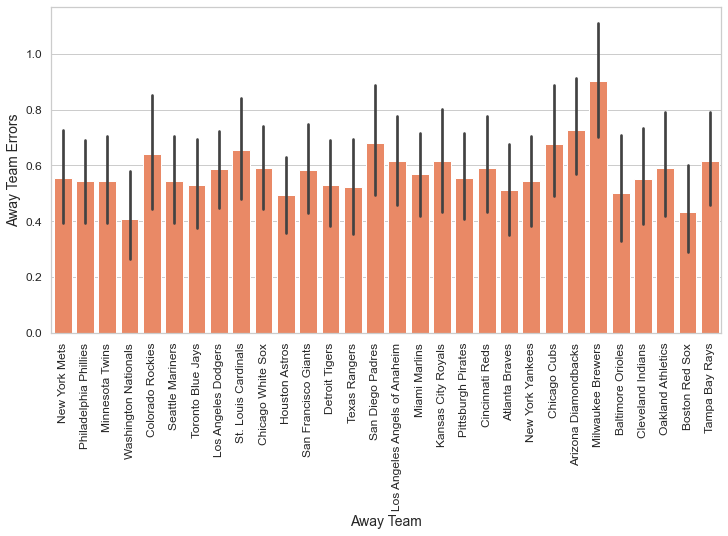

In [972]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(x="away_team", y="away_team_errors", data=partidos, color="coral")
plt.xlabel("Away Team", fontsize=14)
plt.ylabel("Away Team Errors", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

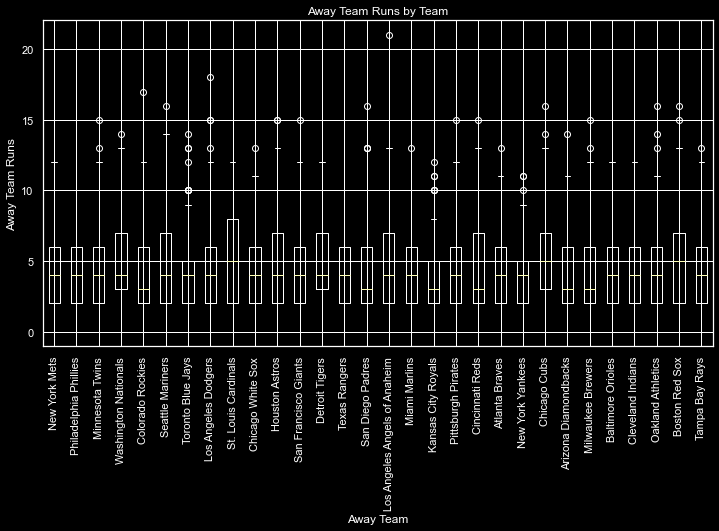

In [990]:
#away_team  
plt.figure(figsize=(12, 6))
plt.boxplot(x=[partidos[partidos['away_team']==team]['away_team_runs'] for team in partidos['away_team'].unique()])
plt.xticks(range(1, len(partidos['away_team'].unique())+1), partidos['away_team'].unique(), rotation=90)
plt.title('Away Team Runs by Team')
plt.ylabel('Away Team Runs')
plt.xlabel('Away Team')
plt.show()

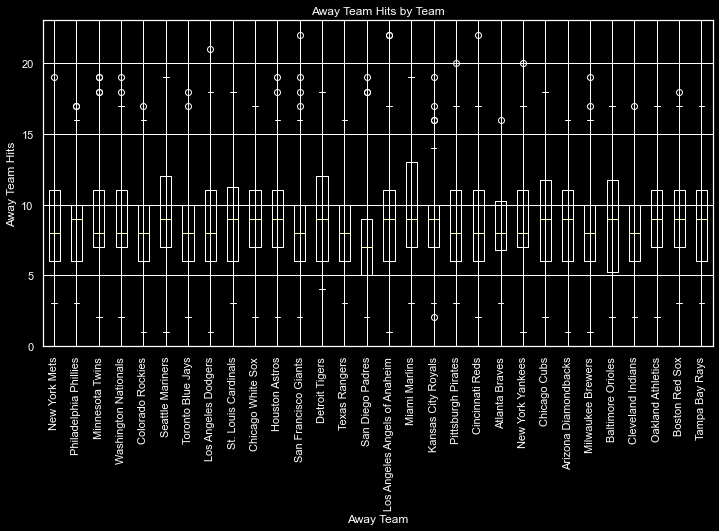

In [991]:
plt.figure(figsize=(12, 6))
plt.boxplot(x=[partidos[partidos['away_team']==team]['away_team_hits'] for team in partidos['away_team'].unique()])
plt.xticks(range(1, len(partidos['away_team'].unique())+1), partidos['away_team'].unique(), rotation=90)
plt.title('Away Team Hits by Team')
plt.ylabel('Away Team Hits')
plt.xlabel('Away Team')
plt.show()

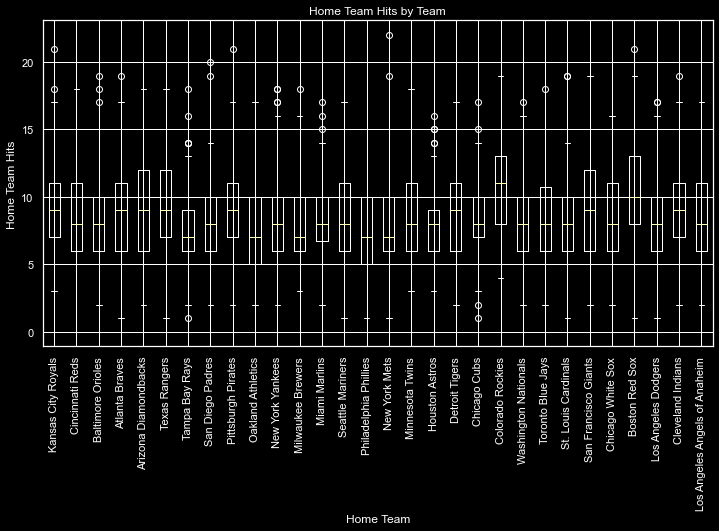

In [992]:
plt.figure(figsize=(12, 6))
plt.boxplot(x=[partidos[partidos['home_team']==team]['home_team_hits'] for team in partidos['home_team'].unique()])
plt.xticks(range(1, len(partidos['home_team'].unique())+1), partidos['home_team'].unique(), rotation=90)
plt.title('Home Team Hits by Team')
plt.ylabel('Home Team Hits')
plt.xlabel('Home Team')
plt.show()

##### Aíslar las variables numéricas & Análisis de correlación

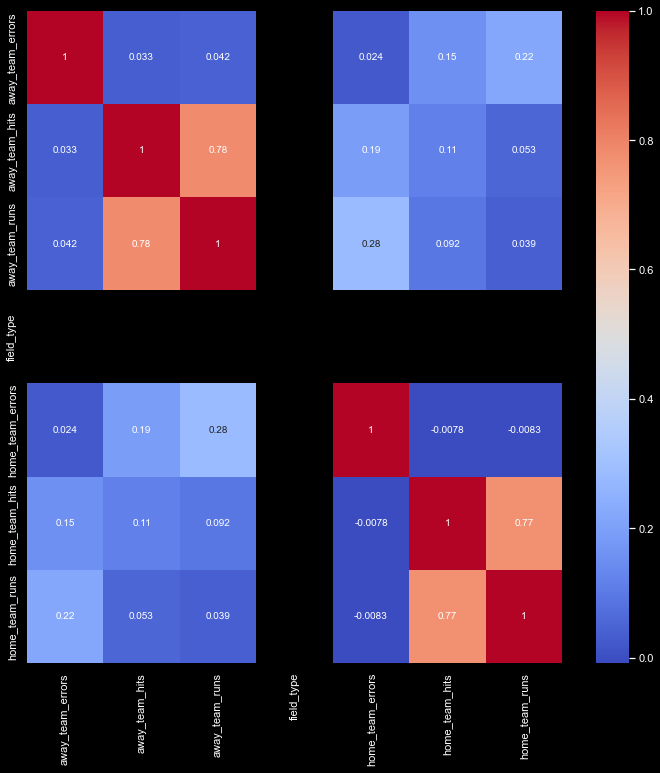

In [976]:
plt.style.use("dark_background")
numeric_vars = partidos.select_dtypes(include=["int64", "float64"])
categorical_vars = partidos.select_dtypes(exclude=["int64", "float64"])
corr = numeric_vars.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

##### Variables categóricas

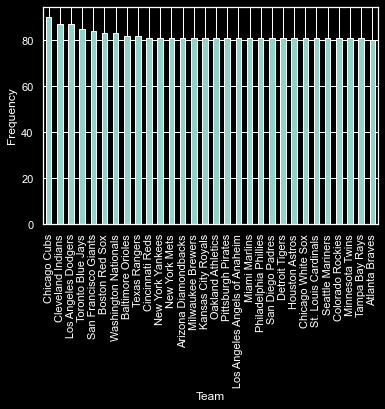

In [977]:
team_counts = partidos["away_team"].value_counts()
team_counts.plot(kind="bar")
plt.xlabel("Team")
plt.ylabel("Frequency")
plt.show()

##### Limpieza de variables

In [978]:
#Descartar field_type porque no posee datos
partidos = partidos.drop("field_type", axis=1)

In [979]:
#Cambiar el formato de date y agregar columna
partidos[['weekday', 'month_day', 'year']] = partidos['date'].str.split(',', expand=True)
partidos = partidos.drop('date', axis=1)
dates = partidos['month_day'].str.split(" ")
month = []
day = []
for x in dates:
    day.append(x[2])
    month.append(x[1])
partidos['month'] = month
partidos['day'] = day
partidos = partidos.drop('month_day', axis=1)

In [980]:
#Limpiando gamme_tpe
partidos[['Period', 'field_type']] = partidos['game_type'].str.split(',', expand=True)
partidos = partidos.drop('game_type', axis=1)

In [981]:
#Limpiando StartTime
partidos['start_time'] = partidos['start_time'].str.replace("Start Time: ", "")
partidos['start_time'] = partidos['start_time'].str.replace(" Local", "")


In [982]:
#Cambiar formato de game_duration
partidos['game_duration'] = partidos['game_duration'].str.replace(": ", "0",1) + ":00"
partidos['game_duration'] = pd.to_datetime(partidos['game_duration'], format='%H:%M:%S',errors='coerce').dt.time

In [983]:
import re

def extract_weather(other_info_string):
    weather_regex = re.compile(r"Start Time Weather:.*")
    weather = weather_regex.search(other_info_string)
    if weather:
        return weather.group().split(":")[1].strip()
    return None

partidos["start_time_weather"] = partidos["other_info_string"].apply(extract_weather)
partidos['start_time_weather'] = partidos['other_info_string'].str.extract(r'Start Time Weather:.*(\d+&deg; F.*)')
partidos['start_time_weather'] = partidos['start_time_weather'].str.replace(r'</strong>', '')
partidos['start_time_weather'] = partidos['start_time_weather'].str.replace(r'</div>', '')

In [984]:
#Descartar "other_info_string" porque no posee datos relevantes
partidos = partidos.drop("other_info_string", axis=1)

In [985]:
#Limpiar datos de attendance
partidos['attendance'] = partidos['attendance'].astype(str)
partidos['attendance'] = partidos['attendance'].str.replace(',', '')
partidos['attendance'] = partidos['attendance'].str.replace("']", '')
partidos['attendance'] = pd.to_numeric(partidos['attendance'], errors='coerce')
partidos.dropna(subset=['attendance'], inplace=True)
partidos['attendance'] = partidos['attendance'].astype(int)

C:\Users\charl\AppData\Local\Temp\ipykernel_7244\2633976379.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [986]:
#Limpiando veneu
partidos['venue'] = partidos['venue'].astype(str)
partidos['venue']= partidos['venue'].str.replace(': ', '')
partidos.dropna(subset=['venue'], inplace=True)

In [987]:
partidos = clean(partidos, method = "duplicates")
partidos = clean(partidos, method = "standardize")
partidos = clean(partidos, method = "dropmissing")

In [988]:
explore(partidos, method="summarize")

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
attendance,int32,2460,0,0.0,2374,8766,22432.0,30604.5,38396.25,54449,30370.703659,30604.5,9875.466703,-0.052484
away_team,object,2460,0,0.0,30,Arizona Diamondbacks,-,-,-,Washington Nationals,-,-,-,-
away_team_errors,int64,2460,0,0.0,6,0,0.0,0.0,1.0,5,0.580081,0.0,0.793227,1.458267
away_team_hits,int64,2460,0,0.0,22,1,6.0,8.0,11.0,22,8.767073,8.0,3.512687,0.512332
away_team_runs,int64,2460,0,0.0,20,0,2.0,4.0,6.0,21,4.415041,4.0,3.10539,0.938899
boxscore_url,object,2460,0,0.0,2460,https://www.baseball-reference.com/boxes/ANA/A...,-,-,-,https://www.baseball-reference.com/boxes/WAS/W...,-,-,-,-
day,object,2460,0,0.0,31,1,-,-,-,9,-,-,-,-
field_type,object,2460,0,0.0,2,on grass,-,-,-,on turf,-,-,-,-
game_duration,object,2460,0,0.0,168,01:15:00,-,-,-,06:13:00,-,-,-,-
home_team,object,2460,0,0.0,30,Arizona Diamondbacks,-,-,-,Washington Nationals,-,-,-,-


In [989]:
partidos.to_csv("nuevo_dataset.csv", index=False)